<a href="https://colab.research.google.com/github/sandyram19/hotel-data-analysis/blob/main/HotelDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
df=pd.read_excel("/content/gdrive/My Drive/assignment.xlsx")
df.head()

,Year,Month,Segment,Region,KPI,Value Type,Value
0,2020,12,Clients,India,Lv1_Visitors,Actuals,3665558
1,2020,12,Clients,India,Lv2_Visitors,Actuals,2689569
2,2020,12,Clients,India,Lv3_Visitors,Actuals,1300571
3,2020,12,Clients,India,Lv4_Visitors,Actuals,717608
4,2020,12,Clients,India,Lv3_Visitors,Actuals,706677


In [ ]:
df.shape

(1572, 7)

In [ ]:
#looking for null values
df.isnull().sum()

Year          0
Month         0
Segment       0
Region        0
KPI           0
Value Type    0
Value         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
print(df['Year'].unique())
print(df['Month'].unique())
print(df['Segment'].unique())
print(df['Region'].unique())
print(df['KPI'].unique())
print(df['Value Type'].unique())

[2020 2021 2022]
[12 11 10  9  8  7  6  5  4  3  2  1]
['Clients' 'Customers']
['India' 'Uddepy' 'Dehradun' 'Ujjain' 'Indore' 'Faridabad' 'Aurangabad']
['Lv1_Visitors' 'Lv2_Visitors' 'Lv3_Visitors' 'Lv4_Visitors'
 'Lv5_Visitors']
['Actuals']


<h1><center><strong>Part 1: Descriptive Analysis</strong></center></h1>
<h3>What type of company this dataset belongs to? </h3>

From the segment column, we can see that the company is serving both clients and customers.

From the region column, we can see that the company is operating in multiple locations in India, including Uddepy, Dehradun, Ujjain, Indore, Faridabad, and Aurangabad.

From the KPI column, we can see that the company is tracking visitor levels, which suggests that it may be a company operating in the tourism or hospitality industry.

In [ ]:
min_values = df.groupby('KPI')['Value'].min()
max_values = df.groupby('KPI')['Value'].max()
min_values

KPI
Lv1_Visitors    6026
Lv2_Visitors     885
Lv3_Visitors     512
Lv4_Visitors     949
Lv5_Visitors     137
Name: Value, dtype: int64

In [ ]:
max_values

KPI
Lv1_Visitors     4703447
Lv2_Visitors     3333479
Lv3_Visitors     2226575
Lv4_Visitors    36986899
Lv5_Visitors      438289
Name: Value, dtype: int64

In [ ]:
avg_values=df.groupby('KPI')['Value'].mean()
avg_values

KPI
Lv1_Visitors    551976.216667
Lv2_Visitors    368444.953333
Lv3_Visitors    296604.138889
Lv4_Visitors    245643.941358
Lv5_Visitors     43758.413580
Name: Value, dtype: float64

I thought levels of visitors are purely based on values. I came to know its not like that and hence we are proceeding with further analysis

In [ ]:
df_pivoted = df.pivot_table(index=['Year', 'Month', 'Segment', 'Region','Value Type'], columns='KPI', values='Value')

# reset the index to make Year, Segment, and Region as columns
df_pivoted = df_pivoted.reset_index()

# display the pivoted dataframe
df_pivoted.head()

KPI,Year,Month,Segment,Region,Value Type,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors
0,2020,1,Clients,India,Actuals,3322789.0,2304318.0,1205316.5,578593.0,181969.5
1,2020,1,Customers,Aurangabad,Actuals,7540.0,4992.0,6850.0,2157.0,934.0
2,2020,1,Customers,Dehradun,Actuals,28903.0,21332.0,25380.0,8578.0,3875.0
3,2020,1,Customers,Faridabad,Actuals,14750.0,12968.0,17720.0,8025.0,2344.0
4,2020,1,Customers,India,Actuals,424743.0,326618.0,371396.0,158246.0,42569.0


In [ ]:
df_pivoted.describe()

KPI,Year,Month,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors
count,300.000000,300.00000,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,300.000000
mean,2021.160000,6.50000,5.519762e+05,3.684450e+05,2.376871e+05,1.658948e+05,34250.021667
std,0.834699,3.45782,1.097225e+06,7.276307e+05,4.166583e+05,1.118532e+06,63392.588094
min,2020.000000,1.00000,6.026000e+03,8.850000e+02,5.120000e+02,9.490000e+02,137.000000
25%,2020.000000,3.75000,2.612100e+04,1.793275e+04,1.322775e+04,4.153000e+03,1378.750000
50%,2021.000000,6.50000,7.869450e+04,5.154850e+04,4.217650e+04,2.026750e+04,6339.000000
75%,2022.000000,9.25000,4.503702e+05,3.222402e+05,2.295285e+05,7.634800e+04,23863.250000
max,2022.000000,12.00000,4.703447e+06,3.333479e+06,1.955083e+06,1.920401e+07,314879.000000


What was the total number of visitors segmented by each level, every month in each year?


In [ ]:
monthlyAnalysis=df.groupby(['Year', 'Month', 'KPI'])['KPI'].count().reset_index(name='Count')
monthlyAnalysis.head(20)

,Year,Month,KPI,Count
0,2020,1,Lv1_Visitors,7
1,2020,1,Lv2_Visitors,7
2,2020,1,Lv3_Visitors,8
3,2020,1,Lv4_Visitors,8
4,2020,1,Lv5_Visitors,8
5,2020,2,Lv1_Visitors,7
6,2020,2,Lv2_Visitors,7
7,2020,2,Lv3_Visitors,8
8,2020,2,Lv4_Visitors,8
9,2020,2,Lv5_Visitors,8


In [ ]:
monthlyAnalysis['Count'].sum()

1572

Just verified that no data missed while pivoting. (1572 rows hence sum is 1572)

Visualisation of Trends


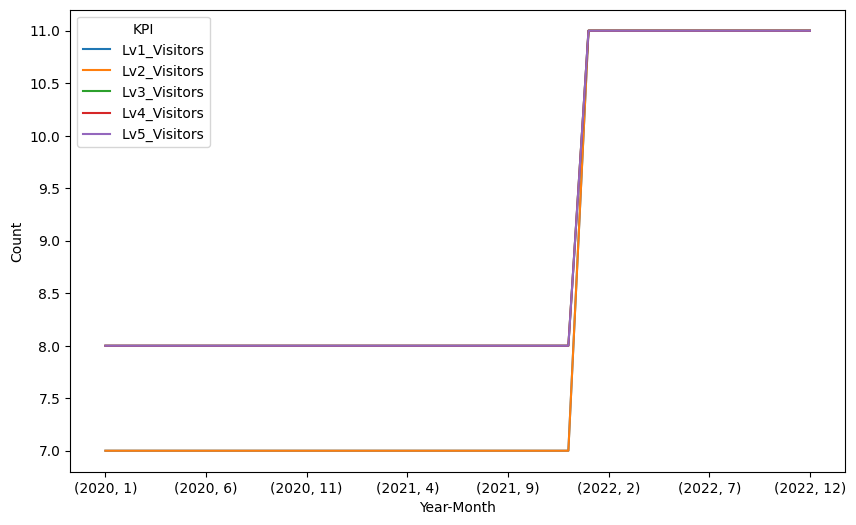

In [ ]:
import matplotlib.pyplot as plt

monthlyPivot = monthlyAnalysis.pivot_table(index=['Year', 'Month'], columns='KPI', values='Count')

# create a line chart
monthlyPivot.plot(kind='line', figsize=(10,6))

# set x and y axis labels
plt.xlabel('Year-Month')
plt.ylabel('Count')

# show the plot
plt.show()

In [ ]:
monthlyPivot.head()

KPI         Lv1_Visitors  Lv2_Visitors  Lv3_Visitors  Lv4_Visitors  \
Year Month                                                           
2020 1                 7             7             8             8   
     2                 7             7             8             8   
     3                 7             7             8             8   
     4                 7             7             8             8   
     5                 7             7             8             8   

KPI         Lv5_Visitors  
Year Month                
2020 1                 8  
     2                 8  
     3                 8  
     4                 8  
     5                 8

Line chart is convenient for finding overall trends and Bar chart focuses on Individual month counts

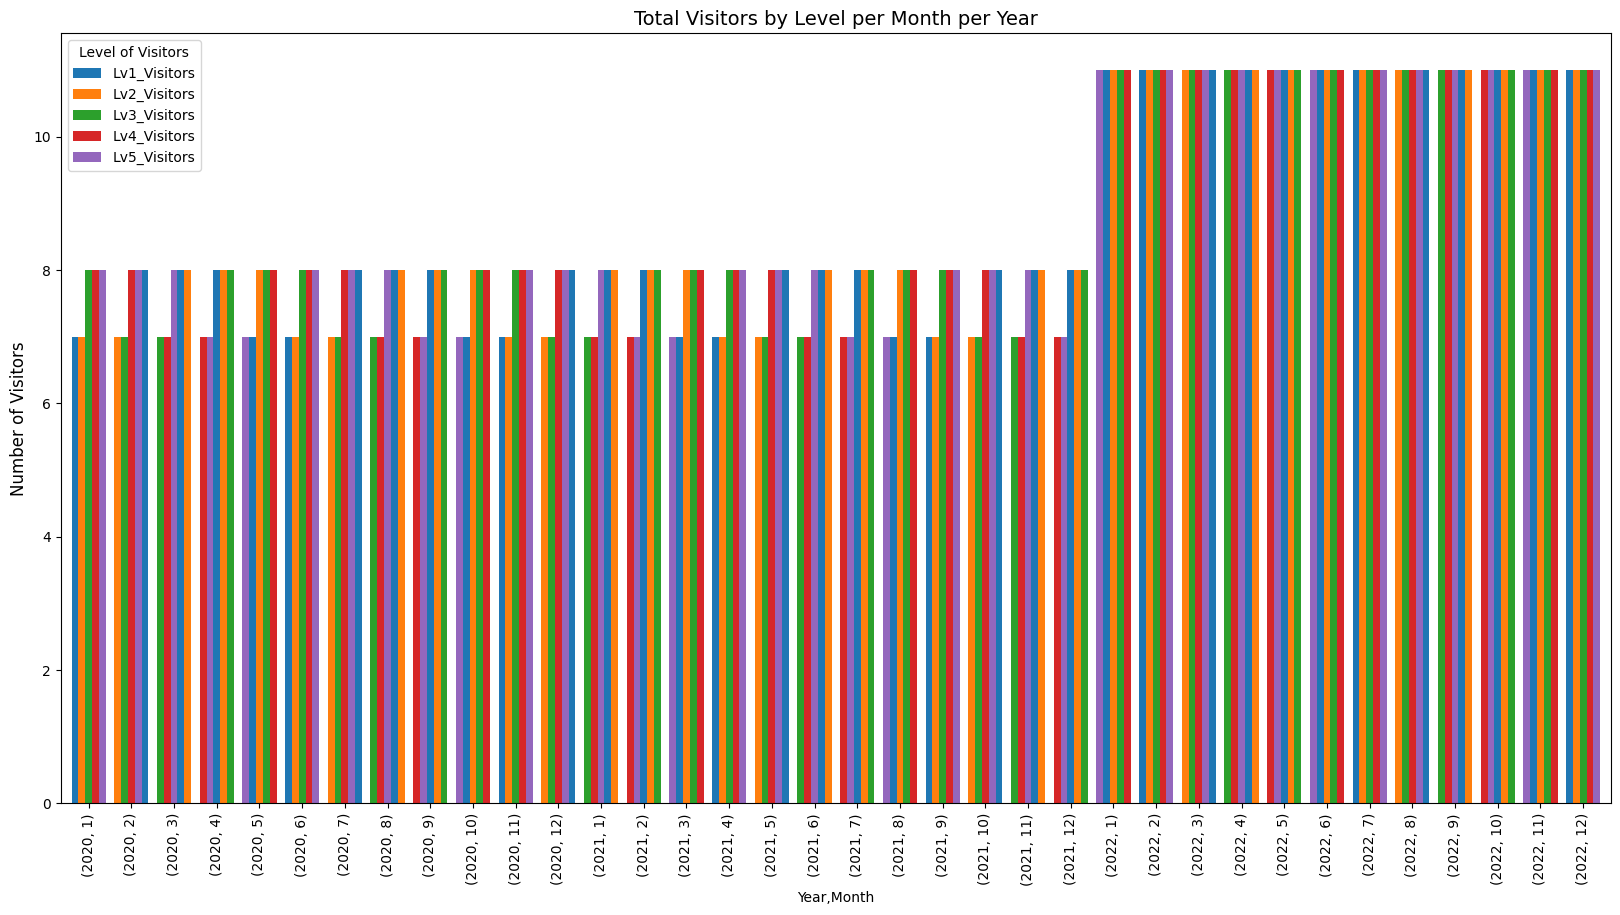

In [ ]:
ax = monthlyPivot.plot(kind='bar',  figsize=(20,10), width=0.8)

# set title and labels
ax.set_title('Total Visitors by Level per Month per Year', fontsize=14)
ax.set_ylabel('Number of Visitors', fontsize=12)

# set legend
ax.legend(title='Level of Visitors', fontsize=10)

# set colors for each level
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i % len(colors)])

plt.show()

What is the percentage difference in the number of visitors between different regions and years?

In [ ]:
# Group by year, region and calculate the sum of visitors
year_region = df.groupby(['Year', 'Region'])[ 'KPI'].count().reset_index(name='Count')

# Pivot the table to create columns for each year
pivot_year_region = year_region.pivot_table(index='Year', columns='Region', values='Count').reset_index()

# Print the result
pivot_year_region

Region,Year,Aurangabad,Dehradun,Faridabad,India,Indore,Uddepy,Ujjain
0,2020,60.0,60.0,60.0,156.0,NaN,60.0,60.0
1,2021,60.0,60.0,60.0,156.0,NaN,60.0,60.0
2,2022,60.0,120.0,60.0,120.0,60.0,120.0,120.0


Here there are NAN values because, there were no visitors in Indore during the years of 2020 and 2021. NAN simple means 0 here

In [ ]:
#imputing NAN values with zero
pivot_year_region.fillna(0,inplace=True)
pivot_year_region

Region,Year,Aurangabad,Dehradun,Faridabad,India,Indore,Uddepy,Ujjain
0,2020,60.0,60.0,60.0,156.0,0.0,60.0,60.0
1,2021,60.0,60.0,60.0,156.0,0.0,60.0,60.0
2,2022,60.0,120.0,60.0,120.0,60.0,120.0,120.0


In [ ]:
percent_year=pivot_year_region.iloc[:, 1:]

In [ ]:
def calculate_percentage(row):
    total = row.sum()
    return row.apply(lambda x: round(x/total*100, 2))

percent_year = percent_year.apply(calculate_percentage, axis=1)
percent_year

Region,Aurangabad,Dehradun,Faridabad,India,Indore,Uddepy,Ujjain
0,13.16,13.16,13.16,34.21,0.00,13.16,13.16
1,13.16,13.16,13.16,34.21,0.00,13.16,13.16
2,9.09,18.18,9.09,18.18,9.09,18.18,18.18


# Finding Outliers

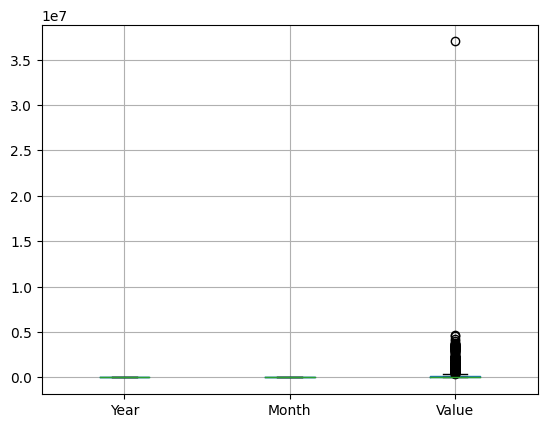

In [ ]:
df.boxplot()
plt.show()

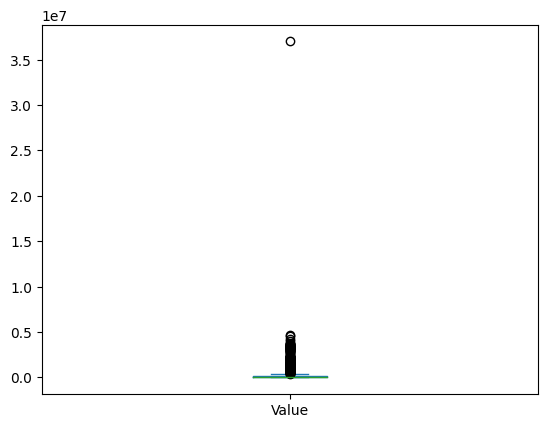

In [ ]:
#Create a boxplot of the dataset
df['Value'].plot(kind='box')

# Display the plot
plt.show()


Outliers present in the dataset seen as individual points outside of the whiskers in the boxplot. To handle outliers, IQR method is used

In [ ]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(df['Value'])
print(len(sample_outliers),"Outliers from IQR method: ", sample_outliers)

247 Outliers from IQR method:  [437011, 438289, 440414, 441798, 442574, 442810, 443097, 447793, 449360, 458102, 461165, 464734, 464743, 465658, 466208, 469431, 469601, 472128, 484447, 492346, 496709, 502679, 503072, 504390, 506023, 506752, 512155, 513130, 513448, 517551, 518074, 520986, 521898, 527377, 530740, 535634, 538410, 542591, 543134, 543885, 548775, 552723, 554469, 554802, 558042, 561741, 563120, 563598, 569614, 574014, 578083, 583821, 584005, 586156, 586669, 589659, 590422, 591901, 591953, 593002, 598734, 599431, 608351, 608543, 612737, 622252, 622611, 629047, 631380, 632424, 634847, 637049, 637409, 637436, 642725, 643474, 648832, 660336, 664367, 664787, 668392, 674950, 675767, 677096, 677346, 678388, 680125, 688464, 688525, 689114, 690996, 694316, 695978, 697639, 699220, 706677, 708302, 708522, 710544, 712806, 714014, 714383, 717608, 718836, 721205, 727451, 729814, 733809, 736291, 745754, 745776, 748273, 750710, 751349, 758856, 767861, 767938, 772490, 781331, 785903, 787621, 

In [ ]:
sample=df['Value']
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
# print(tenth_percentile, ninetieth_percentile)
b =np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print(“Sample:”, sample)
print("New array:",b)


New array: [689055.1 689055.1 689055.1 ...   3101.9   3101.9   3101.9]


# After treatment


In [ ]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(b)
print(len(sample_outliers),"Outliers from IQR method: ", sample_outliers)

247 Outliers from IQR method:  [437011.0, 438289.0, 440414.0, 441798.0, 442574.0, 442810.0, 443097.0, 447793.0, 449360.0, 458102.0, 461165.0, 464734.0, 464743.0, 465658.0, 466208.0, 469431.0, 469601.0, 472128.0, 484447.0, 492346.0, 496709.0, 502679.0, 503072.0, 504390.0, 506023.0, 506752.0, 512155.0, 513130.0, 513448.0, 517551.0, 518074.0, 520986.0, 521898.0, 527377.0, 530740.0, 535634.0, 538410.0, 542591.0, 543134.0, 543885.0, 548775.0, 552723.0, 554469.0, 554802.0, 558042.0, 561741.0, 563120.0, 563598.0, 569614.0, 574014.0, 578083.0, 583821.0, 584005.0, 586156.0, 586669.0, 589659.0, 590422.0, 591901.0, 591953.0, 593002.0, 598734.0, 599431.0, 608351.0, 608543.0, 612737.0, 622252.0, 622611.0, 629047.0, 631380.0, 632424.0, 634847.0, 637049.0, 637409.0, 637436.0, 642725.0, 643474.0, 648832.0, 660336.0, 664367.0, 664787.0, 668392.0, 674950.0, 675767.0, 677096.0, 677346.0, 678388.0, 680125.0, 688464.0, 688525.0, 689055.1000000001, 689055.1000000001, 689055.1000000001, 689055.1000000001, 68

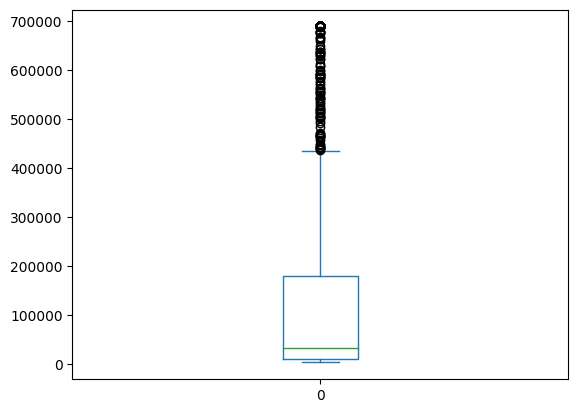

In [ ]:
b=pd.DataFrame(b)
b.plot(kind='box')
plt.show()

Box plot still shows some outliers because boxplot and IQR methods are using different definitions for what constitutes an outlier.So, it's possible that some values that are considered outliers in the boxplot method are not considered outliers in the IQR method, and vice versa. Additionally, different software packages may use slightly different definitions and algorithms for detecting outliers, which can also lead to discrepancies in the results.

# Part 2: Prescriptive Analysis

In [ ]:
df_pivoted.head()

KPI,Year,Month,Segment,Region,Value Type,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors
0,2020,1,Clients,India,Actuals,3322789.0,2304318.0,1205316.5,578593.0,181969.5
1,2020,1,Customers,Aurangabad,Actuals,7540.0,4992.0,6850.0,2157.0,934.0
2,2020,1,Customers,Dehradun,Actuals,28903.0,21332.0,25380.0,8578.0,3875.0
3,2020,1,Customers,Faridabad,Actuals,14750.0,12968.0,17720.0,8025.0,2344.0
4,2020,1,Customers,India,Actuals,424743.0,326618.0,371396.0,158246.0,42569.0


### finding the mean values of region wise KPI

In [ ]:
region_mean = df_pivoted.groupby(['Region'])[['Lv1_Visitors', 'Lv2_Visitors', 'Lv3_Visitors', 'Lv4_Visitors', 'Lv5_Visitors']].mean()
region_mean

KPI,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors
Region,,,,,
Aurangabad,7.693583e+03,5.250944e+03,5818.000000,2112.527778,847.250000
Dehradun,8.942333e+04,5.535346e+04,43276.875000,18444.833333,8408.020833
Faridabad,2.972242e+04,2.322236e+04,23637.055556,9942.416667,3226.944444
India,1.992118e+06,1.341869e+06,820172.034722,619789.312500,114231.923611
Indore,1.235399e+05,7.274392e+04,55164.083333,30112.166667,13762.083333
Uddepy,2.479323e+05,1.546974e+05,140451.708333,56606.604167,21442.812500
Ujjain,6.537229e+04,4.038621e+04,35675.291667,15537.583333,6367.750000


In [ ]:
region_year_mean = df_pivoted.groupby(['Region','Year'])[['Lv1_Visitors', 'Lv2_Visitors', 'Lv3_Visitors', 'Lv4_Visitors', 'Lv5_Visitors']].mean()
region_year_mean

KPI              Lv1_Visitors  Lv2_Visitors   Lv3_Visitors  Lv4_Visitors  \
Region     Year                                                            
Aurangabad 2020  7.673583e+03  5.255917e+03    7342.416667  2.468500e+03   
           2021  8.508333e+03  5.975917e+03    6806.083333  2.647750e+03   
           2022  6.898833e+03  4.521000e+03    3305.500000  1.221333e+03   
Dehradun   2020  3.354992e+04  2.463458e+04   25987.083333  9.312750e+03   
           2021  2.939892e+04  2.087133e+04   17880.416667  6.530250e+03   
           2022  1.473722e+05  8.795396e+04   64620.000000  2.896817e+04   
Faridabad  2020  2.605925e+04  2.293942e+04   29801.416667  1.389342e+04   
           2021  2.998917e+04  2.384567e+04   25574.000000  1.172733e+04   
           2022  3.311883e+04  2.288200e+04   15535.750000  4.206500e+03   
India      2020  2.166809e+06  1.535154e+06  892967.833333  1.170554e+06   
           2021  1.887456e+06  1.262229e+06  635799.479167  2.803307e+05   
           2022  1.922088e+06  1.228223e+06  931748.791667  4.084830e+05   
Indore     2022  1.235399e+05  7.274392e+04   55164.083333  3.011217e+04   
Uddepy     2020  1.082767e+05  8.160067e+04  108728.666667  4.976292e+04   
           2021  8.907025e+04  6.440742e+04   67430.916667  3.043108e+04   
           2022  3.971912e+05  2.363907e+05  192823.625000  7.311621e+04   
Ujjain     2020  3.080325e+04  2.382417e+04   27725.083333  1.140025e+04   
           2021  2.796167e+04  1.933792e+04   18415.166667  7.858417e+03   
           2022  1.013621e+05  5.919138e+04   48280.458333  2.144583e+04   

KPI               Lv5_Visitors  
Region     Year                 
Aurangabad 2020    1051.000000  
           2021    1066.750000  
           2022     424.000000  
Dehradun   2020    4188.166667  
           2021    2902.250000  
           2022   13270.833333  
Faridabad  2020    4829.916667  
           2021    3810.333333  
           2022    1040.583333  
India      2020  125299.791667  
           2021   88539.812500  
           2022  128856.166667  
Indore     2022   13762.083333  
Uddepy     2020   16327.500000  
           2021    9569.166667  
           2022   29937.291667  
Ujjain     2020    4329.500000  
           2021    3095.666667  
           2022    9022.916667

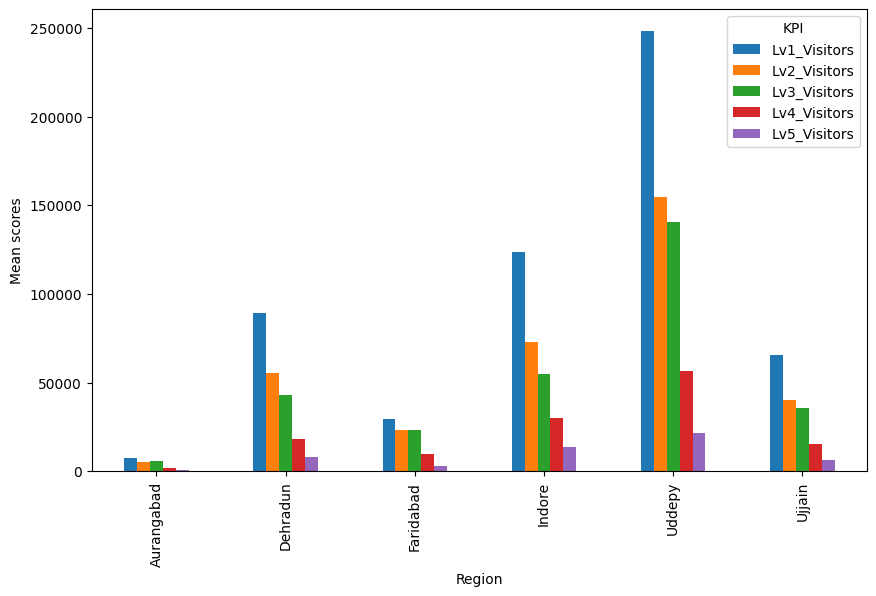

In [ ]:
# create a line chart
rg_sep=region_mean[region_mean.index!='India']
rg_sep.plot(kind='bar', figsize=(10,6))

# set x and y axis labels
plt.xlabel('Region')
plt.ylabel('Mean scores')

# show the plot
plt.show()

Case 1: Level 1 visitors could represent those who visit a site or location but don't engage much beyond that, while Level 5 visitors could represent those who engage in a high level of activity or spend a lot of time/money on the site. <br>Case2: It's also possible that these levels represent different types of visitors, such as first-time visitors (Level 5) versus repeat visitors (Level 1)

# In both the cases, it is found that Aurangabad has been performing worse in All these years.

Reason: Aurangabad is a famous tourist destination and is known for its ancient caves, forts and historical monuments. Maybe in other tourist destinations, people find more interesting or they donot have a good infrastructure facilities or these facilities are overpriced might be the reasons.

Suggestions:
<li>Provide special offers and concessions
<li>Improve the facilities there and give strong advertisements about the improvement and offers so that people find it interesting


In [ ]:
percent_year

Region,Aurangabad,Dehradun,Faridabad,India,Indore,Uddepy,Ujjain
0,13.16,13.16,13.16,34.21,0.00,13.16,13.16
1,13.16,13.16,13.16,34.21,0.00,13.16,13.16
2,9.09,18.18,9.09,18.18,9.09,18.18,18.18


# Better Year on Year growth is found in Uddepy,Ujjain and Dehradun

In [ ]:
region_mean['L5/L1'] = region_mean['Lv5_Visitors']/region_mean['Lv1_Visitors']
region_mean

KPI,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors,L5/L1
Region,,,,,,
Aurangabad,7.693583e+03,5.250944e+03,5818.000000,2112.527778,847.250000,0.110124
Dehradun,8.942333e+04,5.535346e+04,43276.875000,18444.833333,8408.020833,0.094025
Faridabad,2.972242e+04,2.322236e+04,23637.055556,9942.416667,3226.944444,0.108569
India,1.992118e+06,1.341869e+06,820172.034722,619789.312500,114231.923611,0.057342
Indore,1.235399e+05,7.274392e+04,55164.083333,30112.166667,13762.083333,0.111398
Uddepy,2.479323e+05,1.546974e+05,140451.708333,56606.604167,21442.812500,0.086487
Ujjain,6.537229e+04,4.038621e+04,35675.291667,15537.583333,6367.750000,0.097407


In [ ]:
region_mean.sort_values(by='L5/L1', ascending=True)

KPI,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors,L5/L1
Region,,,,,,
India,1.992118e+06,1.341869e+06,820172.034722,619789.312500,114231.923611,0.057342
Uddepy,2.479323e+05,1.546974e+05,140451.708333,56606.604167,21442.812500,0.086487
Dehradun,8.942333e+04,5.535346e+04,43276.875000,18444.833333,8408.020833,0.094025
Ujjain,6.537229e+04,4.038621e+04,35675.291667,15537.583333,6367.750000,0.097407
Faridabad,2.972242e+04,2.322236e+04,23637.055556,9942.416667,3226.944444,0.108569
Aurangabad,7.693583e+03,5.250944e+03,5818.000000,2112.527778,847.250000,0.110124
Indore,1.235399e+05,7.274392e+04,55164.083333,30112.166667,13762.083333,0.111398


L5/L1 value will be higher when L5 is more and L1 is low. Indore customers are only from 2022 hence L5/L1 is higher. Recent years there are less  number of visits to Aurangabad meaning L1 is low(meaning very less new customers) and hence aurangabad has next high value.
# Better states are Uddepy,Dehradun and Ujjain on L5/L1

In [ ]:
region_mean['L5/L3'] = region_mean['Lv5_Visitors']/region_mean['Lv3_Visitors']
region_mean

KPI,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors,L5/L1,L5/L3
Region,,,,,,,
Aurangabad,7.693583e+03,5.250944e+03,5818.000000,2112.527778,847.250000,0.110124,0.145626
Dehradun,8.942333e+04,5.535346e+04,43276.875000,18444.833333,8408.020833,0.094025,0.194284
Faridabad,2.972242e+04,2.322236e+04,23637.055556,9942.416667,3226.944444,0.108569,0.136521
India,1.992118e+06,1.341869e+06,820172.034722,619789.312500,114231.923611,0.057342,0.139278
Indore,1.235399e+05,7.274392e+04,55164.083333,30112.166667,13762.083333,0.111398,0.249475
Uddepy,2.479323e+05,1.546974e+05,140451.708333,56606.604167,21442.812500,0.086487,0.152670
Ujjain,6.537229e+04,4.038621e+04,35675.291667,15537.583333,6367.750000,0.097407,0.178492


In [ ]:
region_mean.sort_values(by='L5/L3', ascending=True)

KPI,Lv1_Visitors,Lv2_Visitors,Lv3_Visitors,Lv4_Visitors,Lv5_Visitors,L5/L1,L5/L3
Region,,,,,,,
Faridabad,2.972242e+04,2.322236e+04,23637.055556,9942.416667,3226.944444,0.108569,0.136521
India,1.992118e+06,1.341869e+06,820172.034722,619789.312500,114231.923611,0.057342,0.139278
Aurangabad,7.693583e+03,5.250944e+03,5818.000000,2112.527778,847.250000,0.110124,0.145626
Uddepy,2.479323e+05,1.546974e+05,140451.708333,56606.604167,21442.812500,0.086487,0.152670
Ujjain,6.537229e+04,4.038621e+04,35675.291667,15537.583333,6367.750000,0.097407,0.178492
Dehradun,8.942333e+04,5.535346e+04,43276.875000,18444.833333,8408.020833,0.094025,0.194284
Indore,1.235399e+05,7.274392e+04,55164.083333,30112.166667,13762.083333,0.111398,0.249475


# Faridabad, Aurangabad, Uddepy are top states
Reason: when we take l5/l3 we are looking into data ignoring the recent years. Aurangabad had a dip in mean score in 2022. Ignoring that its performance is better. Indore is the most recent one hence it has very high value meaning L5(recent customers or new customers)is high and l3 is low

# so in conclusion we can say that L5 is related to lv5 visitors are recent visitors or new visitors and L1 being old or repetitive visitors

# Part 3

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def predict_future(region='India', segment='Clients'):

    df=pd.read_excel("/content/gdrive/My Drive/assignment.xlsx")
    # Filter the data by region and segment
    filtered_df = df[(df['Region'] == region) & (df['Segment'] == segment)]

    # Create a new dataframe with just the date and value columns
    data = filtered_df[['Year', 'Month', 'Value']].copy()
    data['date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str), format='%Y-%m')
    data = data.drop(['Year', 'Month'], axis=1).set_index('date')
    data = data.asfreq('MS')

    # Compute the 6-month moving average
    data['MA6'] = data['Value'].rolling(window=6).mean()

    # Plot the data and the 6-month moving average
    ax = data.plot(figsize=(10, 6))
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.set_title(f'Value for {region} {segment}')
    plt.show()

    # Compute MAPE and RMSE for 2020, 2021 and 2022 predictions
    for year in [2020, 2021, 2022]:
        start_date = pd.to_datetime(str(year) + '-01-01')
        end_date = pd.to_datetime(str(year) + '-12-31')
        y_true = data.loc[start_date:end_date, 'Value']
        y_pred = data.loc[start_date:end_date, 'MA6']
        mape = mean_absolute_percentage_error(y_true, y_pred)
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        print(f'{year} MAPE: {mape:.2%}')
        print(f'{year} RMSE: {rmse:.2f}')



In [ ]:
df=pd.read_excel("/content/gdrive/My Drive/assignment.xlsx")
    # Filter the data by region and segment
filtered_df = df[(df['Region'] =='India') & (df['Segment'] == 'Clients')]

# Create a new dataframe with just the date and value columns
data = filtered_df[['Year', 'Month', 'Value','KPI']].copy()
data=data[(data['KPI']=='Lv5_Visitors')]
data=data[['Year', 'Month', 'Value']]
grouped_data=data.groupby(['Year','Month'])['Value'].sum().reset_index(name='month_wise_values')
grouped_data.head()
#monthlyAnalysis=df.groupby(['Year', 'Month', 'KPI'])['KPI'].count().reset_index(name='Count')
#df_pivoted = df.pivot_table(index=['Year', 'Month', 'Segment', 'Region','Value Type'], columns='KPI', values='Value')


,Year,Month,month_wise_values
0,2020,1,363939
1,2020,2,318689
2,2020,3,380754
3,2020,4,555127
4,2020,5,535507


In [ ]:
grouped_data['six_month_moving_avg'] = grouped_data['month_wise_values'].rolling(window=6).mean()
grouped_data.head()

,Year,Month,month_wise_values,six_month_moving_avg
0,2020,1,363939,NaN
1,2020,2,318689,NaN
2,2020,3,380754,NaN
3,2020,4,555127,NaN
4,2020,5,535507,NaN


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

grouped_data['Year-Month'] = pd.to_datetime(grouped_data['Year'].astype(str) + '-' + grouped_data['Month'].astype(str), format='%Y-%m')
grouped_data = grouped_data.set_index('Year-Month')

# Train the ARIMA model with the first 33 months
train = grouped_data['month_wise_values'][:36]
model = ARIMA(train, order=(2, 1, 0))
model_fit = model.fit()

# Predict the next 6 months
forecast = model_fit.forecast(steps=6)

# Calculate RMSE and MAPE
test = grouped_data['month_wise_values'][33:]
print(forecast)









2023-01-01    84551.461452
2023-02-01    98171.376441
2023-03-01    96852.100074
2023-04-01    96075.356091
2023-05-01    96199.579882
2023-06-01    96241.224776
Freq: MS, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
def predict_future(region='India',segment='Clients'):
  df=pd.read_excel("/content/gdrive/My Drive/assignment.xlsx")
    # Filter the data by region and segment
  filtered_df = df[(df['Region'] ==region) & (df['Segment'] == segment)]

  # Create a new dataframe with just the date and value columns
  data = filtered_df[['Year', 'Month', 'Value','KPI']].copy()
  data=data[(data['KPI']=='Lv5_Visitors')]
  data=data[['Year', 'Month', 'Value']]
  grouped_data=data.groupby(['Year','Month'])['Value'].sum().reset_index(name='month_wise_values')
  grouped_data.head()
  grouped_data['Year-Month'] = pd.to_datetime(grouped_data['Year'].astype(str) + '-' + grouped_data['Month'].astype(str), format='%Y-%m')
  grouped_data = grouped_data.set_index('Year-Month')

  # Train the ARIMA model
  train = grouped_data['month_wise_values']
  model = ARIMA(train, order=(2, 1, 0))
  model_fit = model.fit()

  # Predict the next 6 months
  forecast = model_fit.forecast(steps=6)
  print(forecast)

  # Plot the results
  plt.figure(figsize=(15,6))
  plt.plot(grouped_data['month_wise_values'], label='Actual')
  plt.plot(forecast, label='Forecast')
  plt.legend()
  plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2023-01-01    84551.461452
2023-02-01    98171.376441
2023-03-01    96852.100074
2023-04-01    96075.356091
2023-05-01    96199.579882
2023-06-01    96241.224776
Freq: MS, Name: predicted_mean, dtype: float64


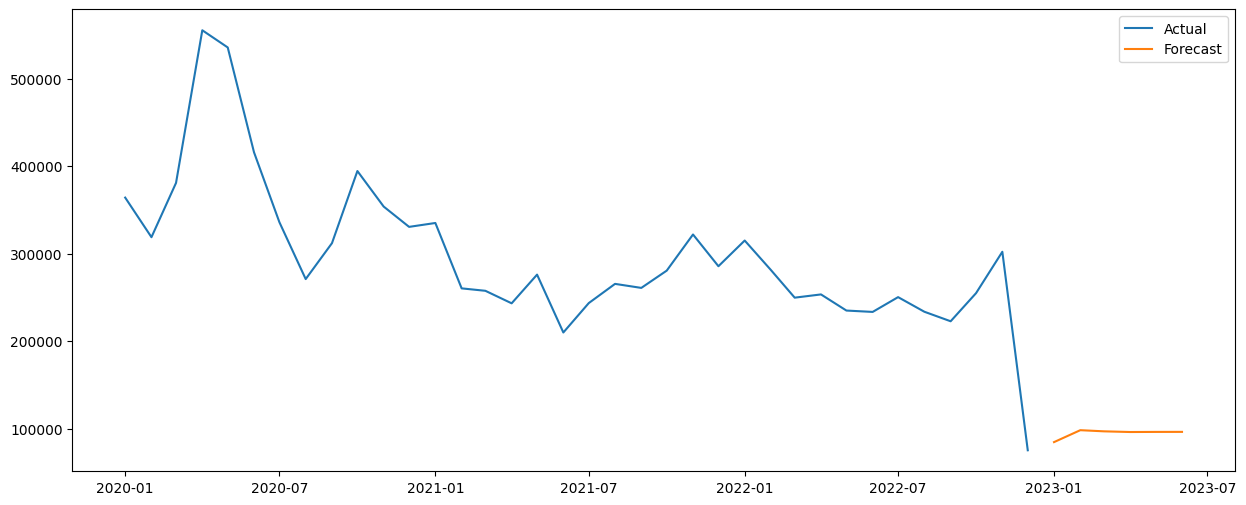

In [ ]:
predict_future('India','Clients')

# Metrics for 2020,2021,2022

MAPE for 2020: 0.24172740487871117
RMSE for 2020: 130808.59091378546


MAPE for 2021: 0.11291512995740267
RMSE for 2021: 36674.540371171955


MAPE for 2022: 0.3211805400589021
RMSE for 2022: 68781.77911390223


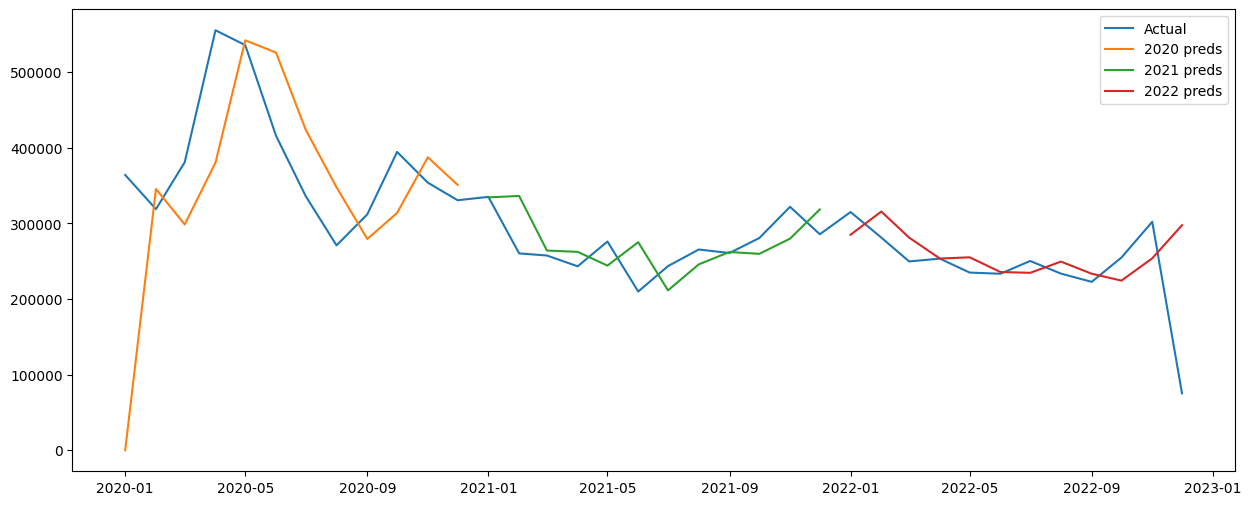

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Extract the predicted values for 2020-2022
pred_2020_2022 = model_fit.predict(start='2020-01-01', end='2022-12-01')

# Calculate the MAPE and RMSE for 2020
y_true_2020 = grouped_data.loc['2020-01-01':'2020-12-01']
y_pred_2020 = pred_2020_2022.loc['2020-01-01':'2020-12-01']
mape_2020 = mean_absolute_percentage_error(y_true_2020['month_wise_values'], y_pred_2020)
rmse_2020 = mean_squared_error(y_true_2020['month_wise_values'], y_pred_2020, squared=False)

# Calculate the MAPE and RMSE for 2021
y_true_2021 = grouped_data.loc['2021-01-01':'2021-12-01']
y_pred_2021 = pred_2020_2022.loc['2021-01-01':'2021-12-01']
mape_2021 = mean_absolute_percentage_error(y_true_2021['month_wise_values'], y_pred_2021)
rmse_2021 = mean_squared_error(y_true_2021['month_wise_values'], y_pred_2021, squared=False)

# Calculate the MAPE and RMSE for 2022
y_true_2022 = grouped_data.loc['2022-01-01':'2022-12-01']
y_pred_2022 = pred_2020_2022.loc['2022-01-01':'2022-12-01']
mape_2022 = mean_absolute_percentage_error(y_true_2022['month_wise_values'], y_pred_2022)
rmse_2022 = mean_squared_error(y_true_2022['month_wise_values'], y_pred_2022, squared=False)

# Print the results
print('MAPE for 2020:', mape_2020)
print('RMSE for 2020:', rmse_2020)
print("\n")
print('MAPE for 2021:', mape_2021)
print('RMSE for 2021:', rmse_2021)
print("\n")
print('MAPE for 2022:', mape_2022)
print('RMSE for 2022:', rmse_2022)

plt.figure(figsize=(15,6))
plt.plot(grouped_data['month_wise_values'],label="Actual")
plt.plot(y_pred_2020,label="2020 preds")
plt.plot(y_pred_2021,label="2021 preds")
plt.plot(y_pred_2022,label="2022 preds")
plt.legend()


# Part 4

In [ ]:
df2=pd.read_excel("/content/gdrive/My Drive/assignment.xlsx",sheet_name=1)
df2.head()

,Date,Address,Variations,DeviceType,Clicks,Visitors
0,2023-04-09,fyttlyf/business/campaign/campaigns-business/c...,Control,Desktop,146,1189
1,2023-04-09,fyttlyf/business/campaign/get-paid///,Treatment,Mobile,19,1389
2,2023-04-09,fyttlyf/business/campaign/campaigns-business/s...,Control,Desktop,134,5752
3,2023-04-09,fyttlyf/business/product/business-financial-se...,Control,Mobile,123,462
4,2023-04-09,fyttlyf/business/product/business-accept-payme...,Control,Mobile,126,3177


In [ ]:
df2.isnull().sum()

Date          0
Address       0
Variations    0
DeviceType    0
Clicks        0
Visitors      0
CTR           0
dtype: int64

In [ ]:
df2.DeviceType.unique()

array(['Desktop', 'Mobile', 'Tablet', 'Others'], dtype=object)

In [ ]:
df2.Variations.unique()

array(['Control', 'Treatment'], dtype=object)

# CTR

In [ ]:
df2['CTR']=(df2['Clicks']/df2['Visitors'])*100
df2.head()

,Date,Address,Variations,DeviceType,Clicks,Visitors,CTR
0,2023-04-09,fyttlyf/business/campaign/campaigns-business/c...,Control,Desktop,146,1189,12.279226
1,2023-04-09,fyttlyf/business/campaign/get-paid///,Treatment,Mobile,19,1389,1.367891
2,2023-04-09,fyttlyf/business/campaign/campaigns-business/s...,Control,Desktop,134,5752,2.329624
3,2023-04-09,fyttlyf/business/product/business-financial-se...,Control,Mobile,123,462,26.623377
4,2023-04-09,fyttlyf/business/product/business-accept-payme...,Control,Mobile,126,3177,3.966006


Conversion Rate of Control and treatment methods

In [ ]:
df2_control=df2[df2['Variations']=='Control']
df2_treatment=df2[df2['Variations']=='Treatment']
conversionRatecontrol=df2_control['Clicks'].sum()*100/df2_control['Visitors'].sum()
conversionRatetreatment=df2_treatment['Clicks'].sum()*100/df2_treatment['Visitors'].sum()
print("Conversion rate of Control method  :",conversionRatecontrol)
print("Conversion rate of Treatment method:",conversionRatetreatment)

Conversion rate of Control method  : 10.263612075235361
Conversion rate of Treatment method: 23.43454801719027


In [ ]:
deviceAnalysis=df2.groupby(['Variations','DeviceType'])
ctr = (deviceAnalysis['Clicks'].sum() / deviceAnalysis['Visitors'].sum()) * 100
ctr

Variations  DeviceType
Control     Desktop        9.557251
            Mobile        11.360232
            Others         8.229722
            Tablet         9.032284
Treatment   Desktop       28.696373
            Mobile        16.028690
            Others         8.815789
            Tablet        15.261225
dtype: float64

#From this it is safe to say that, Control variations is better for Mobiles and Treatment is better for Desktop and Tablet